In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from heatmap import *
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
pd.set_option('use_inf_as_na', True)

In [45]:
from scipy import stats
def chiSquare(depVar, indepVar):
    contTable = pd.crosstab(indepVar, depVar, margins=False)
    print(contTable)
    obsV = np.array(contTable)
    chi2_stat, p_val, dof, ex = stats.chi2_contingency(obsV)
    print("===Chi2 Stat===")
    print(chi2_stat)
    print("\n")
    print("===Degrees of Freedom===")
    print(dof)
    print("\n")
    print("===P-Value===")
    print(p_val)
    print("\n")
    print("===Contingency Table===")
    print(ex)
    return obsV
    

In [2]:
print("Dens")
with open("../rawData/ischDB/density.csv", 'r') as densFile:
    dens = pd.read_csv(densFile, sep=",", encoding='utf-8', dtype={"Season":"int"}, parse_dates=["Date"])
print("Eggs")
with open("../rawData/ischDB/eggs.csv", 'r') as eggFile:
    eggs= pd.read_csv(eggFile, sep=",", encoding='utf-8',parse_dates=["Date"])
print("ind")
with open("../rawData/ischDB/individuals.csv", 'r') as indFile:
    ind=pd.read_csv(indFile, sep=",", encoding = 'utf-8', parse_dates=["Date"], dtype={"Sex":"object", "Copula":"object", "Part_ID":"object", "Morph":"object", "Data_entry":"object"})

dens.columns = dens.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('-', '_')
eggs.columns = eggs.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('-', '_')
ind.columns = ind.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('-', '_')

eggs["Locale"][eggs["Locale"]=="IKEA"]="Ikea"
ind["Locale"][ind["Locale"]=="IKEA"]="Ikea"
ind["Locale"][ind["Locale"]=="Vombs vattenverk"]="Vombs Vattenverk"

Dens
Eggs
ind


c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

In [54]:
dens["No_females"].fillna(value=0, inplace=True)
dens["No_males"].fillna(value=0, inplace=True)
ind["Morph"].fillna(value="unknown", inplace=True)
ind["Locale"].fillna(value="unknown", inplace=True)

dens["No_indiv"] = dens["No_females"]+dens["No_males"]
dens["cpm"] = dens["No_indiv"]/dens["Catching_time_min"]
eggInd = pd.merge(eggs, ind, on='Season_ID')
eggInd = eggInd[eggInd["Morph"]!= "unknown"]
#eggInd = eggInd[pd.isnull(eggInd["Col_phas"])]


c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:             No_females   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     2808.
Date:                Thu, 22 Aug 2019   Prob (F-statistic):               0.00
Time:                        12:31:24   Log-Likelihood:                -5741.3
No. Observations:                1707   AIC:                         1.149e+04
Df Residuals:                    1705   BIC:                         1.150e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
No_males       0.5732      0.011     52.994      0.0

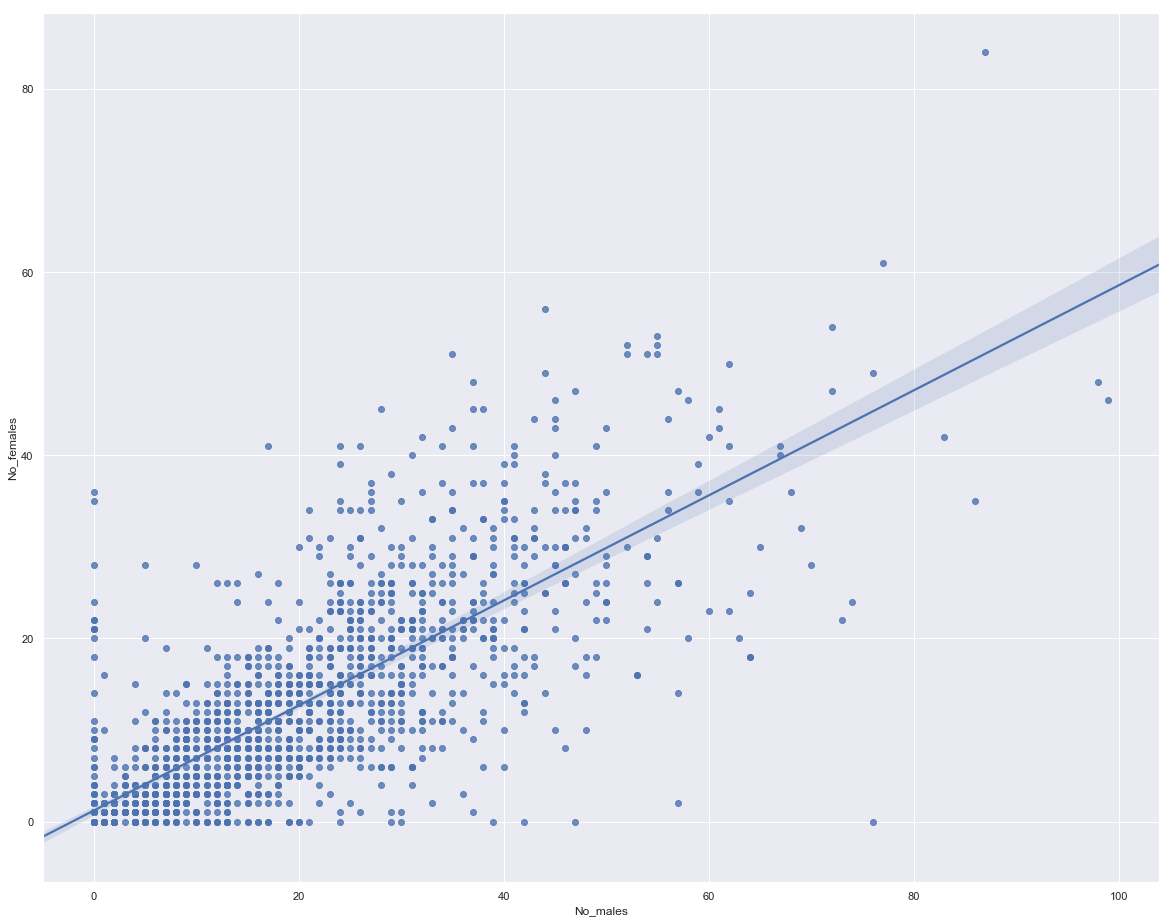

In [4]:
densSub = dens[dens.groupby("Locale")["Locale"].transform('count')>9]
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1 = sns.regplot(x="No_males", y="No_females", data=dens, ax=axarr)
est=sm.OLS(dens["No_females"], sm.add_constant(dens["No_males"], prepend=False)).fit()
print(est.summary())

In [55]:
eggMorphFit = smf.ols(formula="Egg_count~C(Morph)", data=eggInd).fit()
print(eggMorphFit.summary())
table=sm.stats.anova_lm(eggMorphFit,typ=2)
print(table)
mc = MultiComparison(eggInd["Egg_count"], eggInd["Morph"])
mc_results=mc.tukeyhsd()
print(mc_results)

print(eggInd["Egg_count"][eggInd["Morph"]=="infuscans"].mean())
print(eggInd["Egg_count"][eggInd["Morph"]!="infuscans"].mean())

"""
mc = MultiComparison(eggInd["Egg_count"], eggInd["Locale_y"])
mc_results=mc.tukeyhsd()
print(mc_results)
"""

                            OLS Regression Results                            
Dep. Variable:              Egg_count   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     21.81
Date:                Thu, 22 Aug 2019   Prob (F-statistic):           3.62e-10
Time:                        13:40:12   Log-Likelihood:                -41237.
No. Observations:                6390   AIC:                         8.248e+04
Df Residuals:                    6387   BIC:                         8.250e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

'\nmc = MultiComparison(eggInd["Egg_count"], eggInd["Locale_y"])\nmc_results=mc.tukeyhsd()\nprint(mc_results)\n'

In [56]:
eggInd["eggYN"] = eggInd["Egg_count"]
eggInd["eggYN"][eggInd["Egg_count"]>0] = 1

chiSquare(eggInd["eggYN"], eggInd["Morph"])

for i in range(1, len(eggInd.Morph.unique())):
    morph1 = eggInd.Morph.unique()[i]
    for j in range(i):
        morph2 = eggInd.Morph.unique()[j]
        subset = eggInd.loc[eggInd["Morph"].isin([morph1, morph2])]
        chiSquare(subset["eggYN"], subset["Morph"])

eggYN               0.0   1.0
Morph                        
androchrome         626  3364
infuscans           272  1766
infuscans-obsoleta   66   296
===Chi2 Stat===
8.744677986873137


===Degrees of Freedom===
2


===P-Value===
0.012621683979161018


===Contingency Table===
[[ 601.9342723  3388.0657277 ]
 [ 307.4541471  1730.5458529 ]
 [  54.61158059  307.38841941]]
eggYN        0.0   1.0
Morph                 
androchrome  626  3364
infuscans    272  1766
===Chi2 Stat===
5.656883246455134


===Degrees of Freedom===
1


===P-Value===
0.017386993911885223


===Contingency Table===
[[ 594.39615129 3395.60384871]
 [ 303.60384871 1734.39615129]]
eggYN               0.0   1.0
Morph                        
androchrome         626  3364
infuscans-obsoleta   66   296
===Chi2 Stat===
1.4202559673903161


===Degrees of Freedom===
1


===P-Value===
0.23336127669917933


===Contingency Table===
[[ 634.43933824 3355.56066176]
 [  57.56066176  304.43933824]]
eggYN               0.0   1.0
Morph     

c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [53]:
withEggs = eggInd[eggInd["eggYN"]==1]
eggMorphFit = smf.ols(formula="Egg_count~C(Morph)", data=withEggs).fit()
print(eggMorphFit.summary())
table=sm.stats.anova_lm(eggMorphFit,typ=2)
print(table)
mc = MultiComparison(withEggs["Egg_count"], withEggs["Morph"])
mc_results=mc.tukeyhsd()
print(mc_results)

print(withEggs["Egg_count"][withEggs["Morph"]=="infuscans"].mean())
print(withEggs["Egg_count"][withEggs["Morph"]!="infuscans"].mean())

                            OLS Regression Results                            
Dep. Variable:              Egg_count   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     20.01
Date:                Thu, 22 Aug 2019   Prob (F-statistic):           2.20e-09
Time:                        13:36:56   Log-Likelihood:                -33888.
No. Observations:                5331   AIC:                         6.778e+04
Df Residuals:                    5328   BIC:                         6.780e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [6]:
indSub = ind[ind.groupby("Locale")["Locale"].transform('count')>9]
paraFit = smf.ols(formula="Parasite~C(Locale)", data=indSub).fit()
print(paraFit.summary())
table = sm.stats.anova_lm(paraFit, typ=2)
print(table)

                            OLS Regression Results                            
Dep. Variable:               Parasite   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     178.5
Date:                Thu, 22 Aug 2019   Prob (F-statistic):               0.00
Time:                        12:31:25   Log-Likelihood:            -1.6382e+05
No. Observations:               49950   AIC:                         3.277e+05
Df Residuals:                   49925   BIC:                         3.279e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\base\model.py:1532: ValueWarning: covariance of constraints does not have full rank. The n

                            OLS Regression Results                            
Dep. Variable:              Egg_count   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     37.49
Date:                Thu, 22 Aug 2019   Prob (F-statistic):           9.82e-10
Time:                        12:31:25   Log-Likelihood:                -36851.
No. Observations:                5716   AIC:                         7.371e+04
Df Residuals:                    5714   BIC:                         7.372e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    198.0701      2.082     95.120      0.0

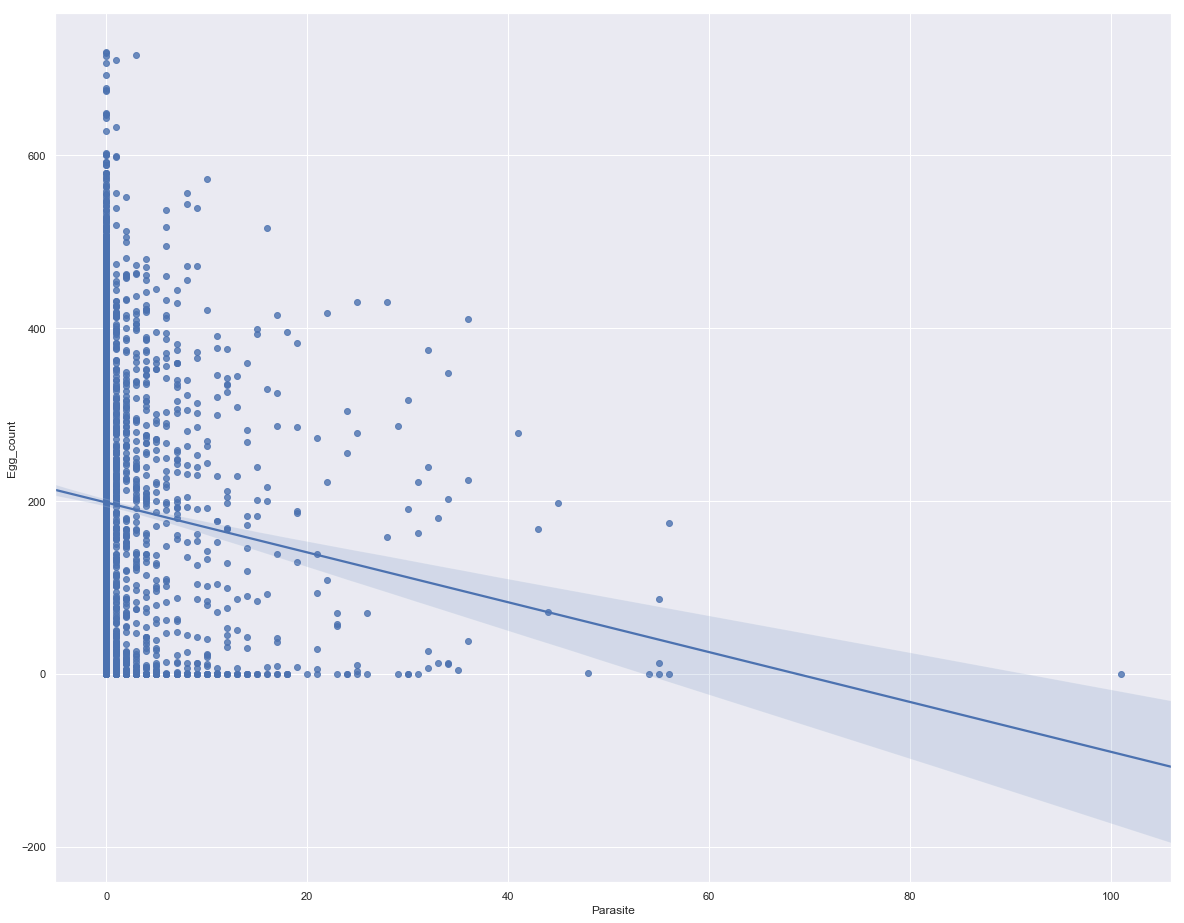

In [7]:
eggParFit = smf.ols(formula="Egg_count~Parasite", data=eggInd).fit()
print(eggParFit.summary())
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1 = sns.regplot(x="Parasite", y="Egg_count", data=eggInd, ax=axarr)

In [8]:
print(paraFit.diagn)

{'jb': 47151377.19550998, 'jbpv': 0.0, 'skew': 9.264292186046942, 'kurtosis': 152.37204534778655, 'omni': 75179.48537699707, 'omnipv': 0.0, 'condno': 1.0348748223758022e+16, 'mineigval': 4.987018405435863e-28}


In [71]:
matureInd = ind[ind["Age"]=="mature"]
matureFem = matureInd[matureInd["Sex"]=='0'][matureInd["Morph"] != 'unknown'][pd.notnull(matureInd["Copula"])]
print(matureFem["Col_phas"].value_counts(dropna=False))
print(matureFem["Morph"].value_counts(dropna=False))
print(matureFem["Copula"].value_counts(dropna=False))

NaN                      11637
rufescens                  289
violacea(androchrome)      155
violacea                   126
violacea(infuscans)        119
teneral                      3
infuscans                    2
Name: Col_phas, dtype: int64
androchrome           8552
infuscans             3026
infuscans-obsoleta     753
Name: Morph, dtype: int64
1    6961
0    5370
Name: Copula, dtype: int64


c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [67]:
copMorph = chiSquare(matureFem["Copula"], matureFem["Morph"])

Copula                 0     1
Morph                         
androchrome         4236  4316
infuscans            734  2292
infuscans-obsoleta   400   353
===Chi2 Stat===
610.7405052351473


===Degrees of Freedom===
2


===P-Value===
2.395434779312071e-133


===Contingency Table===
[[3724.29162274 4827.70837726]
 [1317.78606763 1708.21393237]
 [ 327.92230963  425.07769037]]


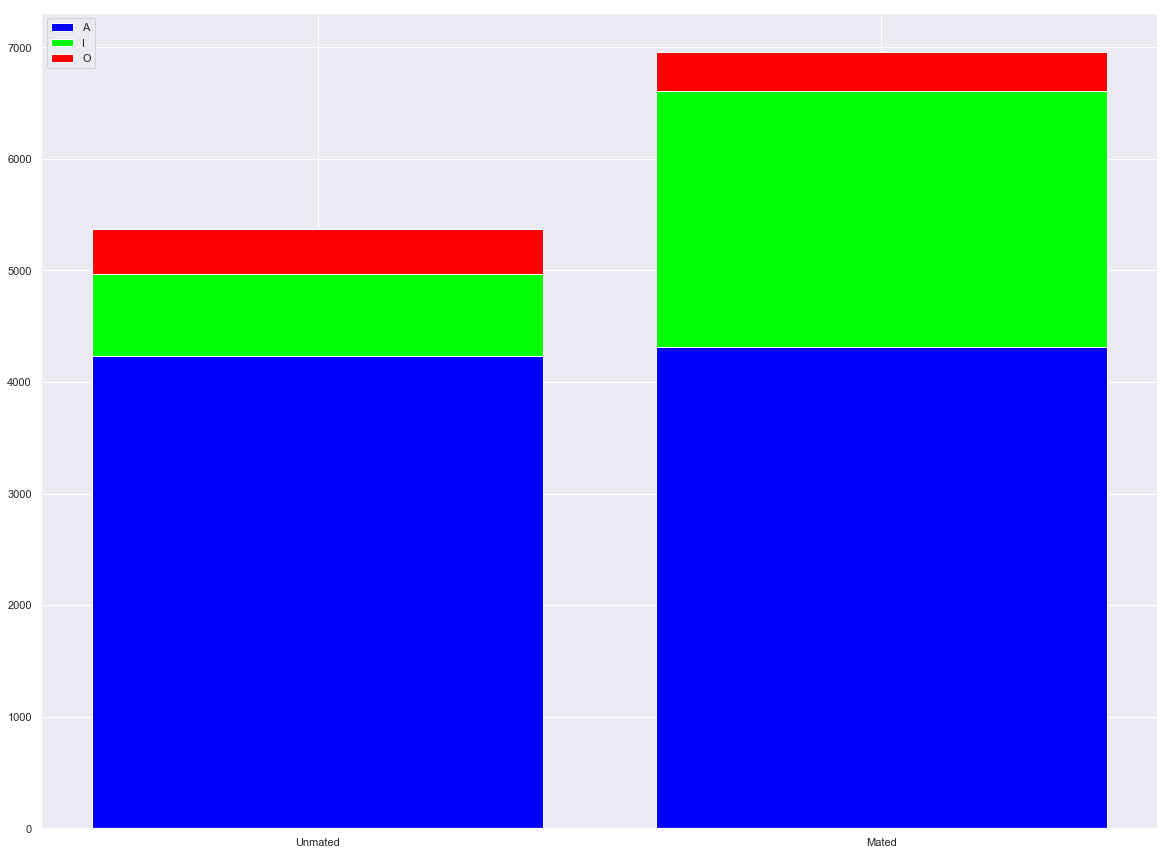

In [68]:
fig = plt.figure(figsize=(20,15))
categories=["Unmated", "Mated"]
p1=plt.bar(categories, copMorph[0], color='#0000ff')
p2=plt.bar(categories, copMorph[1], color='#00ff00', bottom=copMorph[0])
p3=plt.bar(categories, copMorph[2], color='#ff0000', bottom=copMorph[1]+copMorph[0])
plt.legend((p1[0], p2[0], p3[0]), ('A', 'I', 'O'))
plt.show()

In [73]:
matureFem = matureFem[pd.notnull(matureFem["Col_phas"])]

for i in range(1, len(matureFem.Morph.unique())):
    morph1 = matureFem.Morph.unique()[i]
    for j in range(i):
        morph2 = matureFem.Morph.unique()[j]
        subset = matureFem.loc[matureFem["Morph"].isin([morph1, morph2])]
        chiSquare(subset["Copula"], subset["Morph"])

Copula                0   1
Morph                      
androchrome         227  31
infuscans-obsoleta  255  35
===Chi2 Stat===
0.012606763210203084


===Degrees of Freedom===
1


===P-Value===
0.9106015234537255


===Contingency Table===
[[226.9270073  31.0729927]
 [255.0729927  34.9270073]]
Copula                0   1
Morph                      
infuscans           117  29
infuscans-obsoleta  255  35
===Chi2 Stat===
4.108449853591763


===Degrees of Freedom===
1


===P-Value===
0.04266945517571237


===Contingency Table===
[[124.56880734  21.43119266]
 [247.43119266  42.56880734]]
Copula         0   1
Morph               
androchrome  227  31
infuscans    117  29
===Chi2 Stat===
3.9411864613971272


===Degrees of Freedom===
1


===P-Value===
0.047117534974705264


===Contingency Table===
[[219.68316832  38.31683168]
 [124.31683168  21.68316832]]


In [13]:
densDropNA = dens[pd.notnull(dens["Proportion_androchrome_copulating"])][pd.notnull(dens["Proportion_infuscans_copulating"])][pd.notnull(dens["Proportion_infuscans_obsoleta_copulating"])]
print(ttest_ind(densDropNA["Proportion_androchrome_copulating"], densDropNA["Proportion_infuscans_copulating"]))
print(ttest_ind(densDropNA["Proportion_androchrome_copulating"], densDropNA["Proportion_infuscans_obsoleta_copulating"]))
print(ttest_ind(densDropNA["Proportion_infuscans_copulating"], densDropNA["Proportion_infuscans_obsoleta_copulating"]))
print(dens.Proportion_androchrome_copulating.mean())
print(dens.Proportion_infuscans_copulating.mean())
print(dens["Proportion_infuscans_obsoleta_copulating"].mean())

(-8.65802340323339, 2.790585951911156e-17, 770.0)
(3.6703678873275494, 0.00025891178835560054, 770.0)
(10.79960018722317, 2.056927761676532e-25, 770.0)
0.4260285941223193
0.7086769570011026
0.3785631067961165


c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


# Density vs Copulation

In [35]:
dens["freqA"] = dens["No_androchromes"]/dens["No_females"]
dens.loc[dens["freqA"] > 1, "freqA"] = np.nan
dens["freqI"] = dens["No_infuscans"]/dens["No_females"]
dens.loc[dens["freqI"] > 1, "freqI"] = np.nan
dens["freqO"] = dens["No_infuscans_obsoleta"]/dens["No_females"]
dens.loc[dens["freqO"] > 1, "freqO"] = np.nan
dens["freqM"] = dens["No_males"]/dens["No_indiv"]
dens.loc[dens["freqM"] > 1, "freqM"] = np.nan
dens["tFreqA"] = dens["No_androchromes"]/dens["No_indiv"]
dens.loc[dens["tFreqA"] > 1, "tFreqA"] = np.nan
dens["tFreqI"] = dens["No_infuscans"]/dens["No_indiv"]
dens.loc[dens["tFreqI"] > 1, "tFreqI"] = np.nan
dens["tFreqO"] = dens["No_infuscans_obsoleta"]/dens["No_indiv"]
dens.loc[dens["tFreqO"] >= 1, "tFreqO"] = np.nan



                                    OLS Regression Results                                   
Dep. Variable:     Proportion_androchrome_copulating   R-squared:                       0.007
Model:                                           OLS   Adj. R-squared:                  0.006
Method:                                Least Squares   F-statistic:                     8.695
Date:                               Thu, 22 Aug 2019   Prob (F-statistic):            0.00325
Time:                                       12:32:26   Log-Likelihood:                -512.43
No. Observations:                               1247   AIC:                             1029.
Df Residuals:                                   1245   BIC:                             1039.
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                 coef    std err          t      P>|t|      

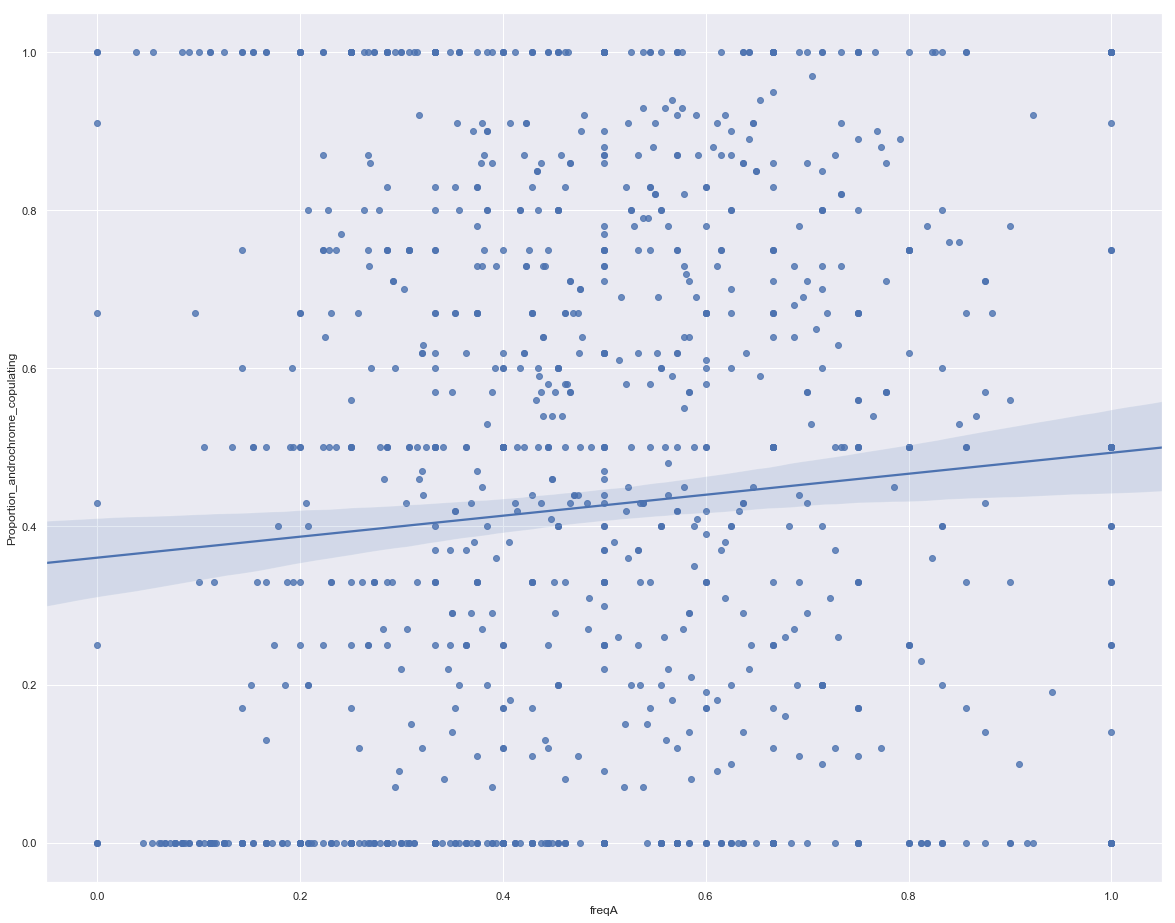

In [16]:
aComp = smf.ols(formula="Proportion_androchrome_copulating~freqA", data=dens[pd.notnull(dens["freqA"])], missing='drop').fit()
print(aComp.summary())
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1 = sns.regplot(x="freqA", y="Proportion_androchrome_copulating", data=dens, ax=axarr)

                                   OLS Regression Results                                  
Dep. Variable:     Proportion_infuscans_copulating   R-squared:                       0.006
Model:                                         OLS   Adj. R-squared:                  0.005
Method:                              Least Squares   F-statistic:                     5.652
Date:                             Thu, 22 Aug 2019   Prob (F-statistic):             0.0176
Time:                                     12:32:29   Log-Likelihood:                -440.23
No. Observations:                              905   AIC:                             884.5
Df Residuals:                                  903   BIC:                             894.1
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-

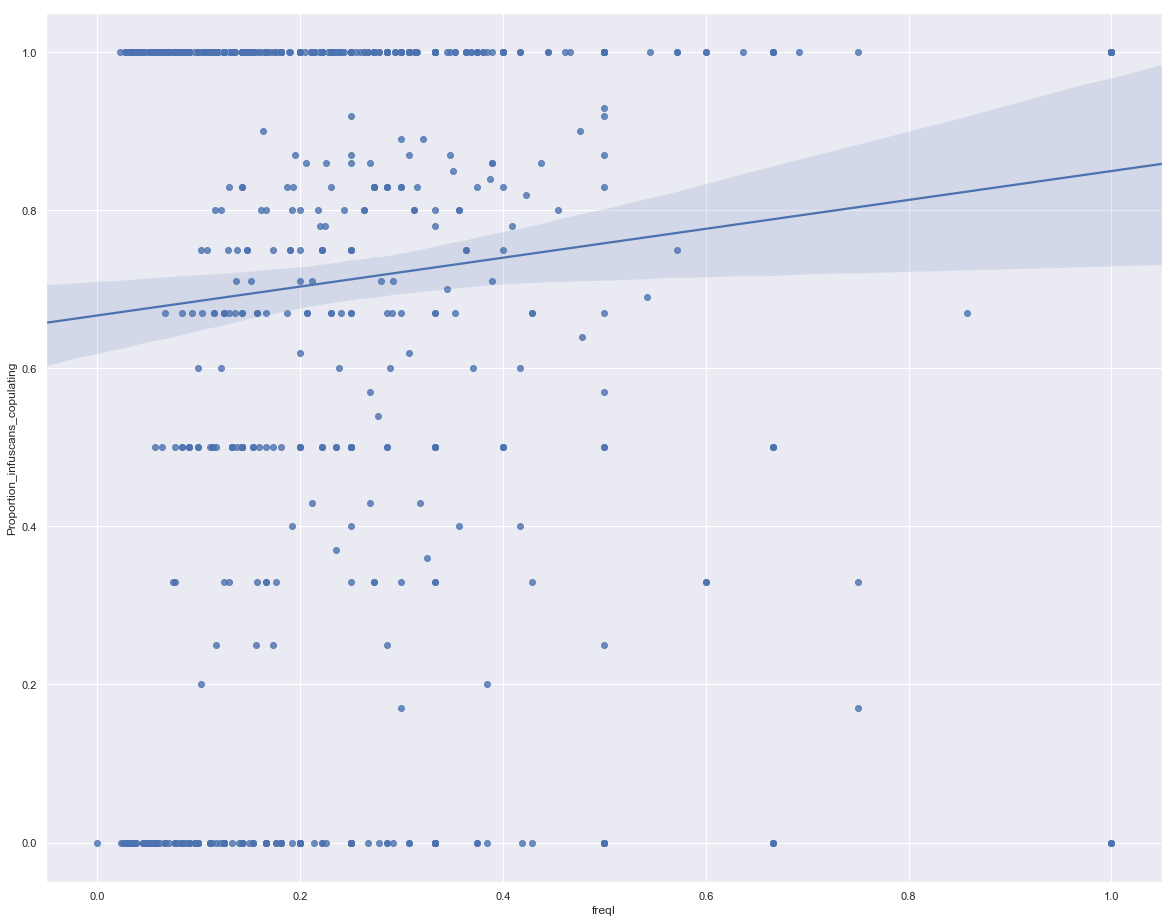

In [17]:
iComp = smf.ols(formula="Proportion_infuscans_copulating~freqI", data=dens[pd.notnull(dens["freqI"])], missing='drop').fit()
print(iComp.summary())
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1 = sns.regplot(x="freqI", y="Proportion_infuscans_copulating", data=dens, ax=axarr)

                                       OLS Regression Results                                       
Dep. Variable:     Proportion_infuscans_obsoleta_copulating   R-squared:                       0.007
Model:                                                  OLS   Adj. R-squared:                  0.005
Method:                                       Least Squares   F-statistic:                     3.656
Date:                                      Thu, 22 Aug 2019   Prob (F-statistic):             0.0564
Time:                                              12:32:32   Log-Likelihood:                -310.38
No. Observations:                                       514   AIC:                             624.8
Df Residuals:                                           512   BIC:                             633.3
Df Model:                                                 1                                         
Covariance Type:                                  nonrobust                                

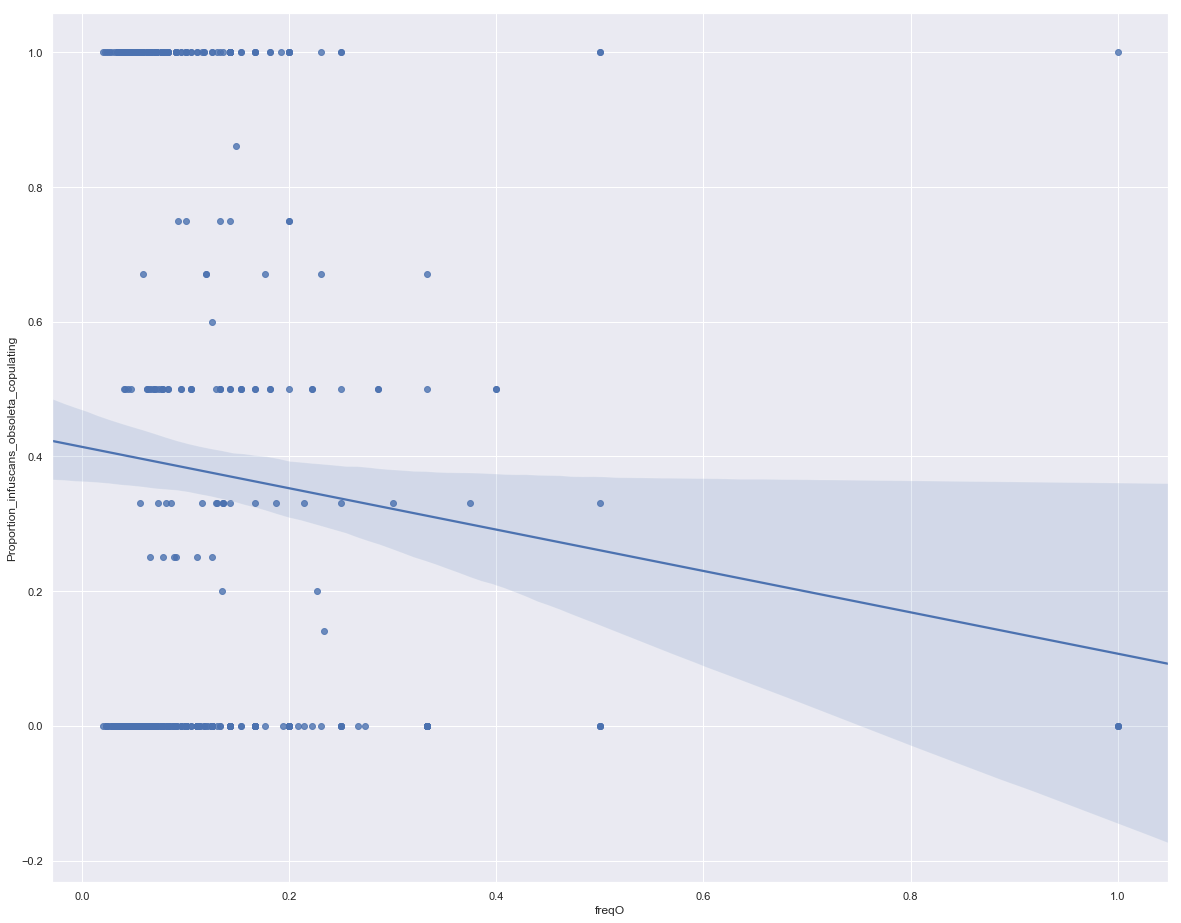

In [18]:
oComp = smf.ols(formula="Proportion_infuscans_obsoleta_copulating~freqO", data=dens[pd.notnull(dens["freqO"])], missing='drop').fit()
print(oComp.summary())
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1 = sns.regplot(x="freqO", y="Proportion_infuscans_obsoleta_copulating", data=dens, ax=axarr)

                                    OLS Regression Results                                   
Dep. Variable:     Proportion_androchrome_copulating   R-squared:                       0.001
Model:                                           OLS   Adj. R-squared:                  0.001
Method:                                Least Squares   F-statistic:                     1.636
Date:                               Thu, 22 Aug 2019   Prob (F-statistic):              0.201
Time:                                       12:34:25   Log-Likelihood:                -517.06
No. Observations:                               1250   AIC:                             1038.
Df Residuals:                                   1248   BIC:                             1048.
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                 coef    std err          t      P>|t|      

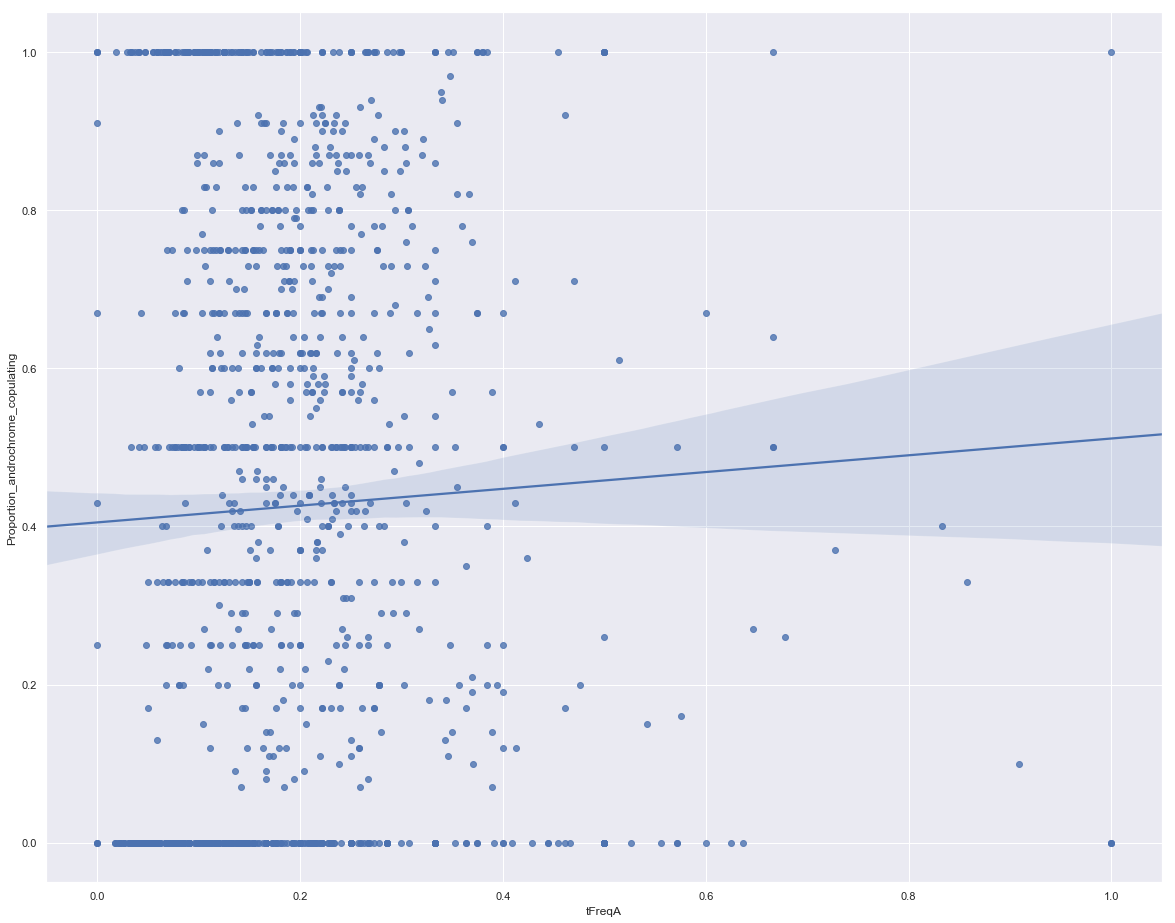

In [20]:
aComp = smf.ols(formula="Proportion_androchrome_copulating~tFreqA", data=dens[pd.notnull(dens["tFreqA"])], missing='drop').fit()
print(aComp.summary())
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1 = sns.regplot(x="tFreqA", y="Proportion_androchrome_copulating", data=dens, ax=axarr)

c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


                                    OLS Regression Results                                   
Dep. Variable:     Proportion_androchrome_copulating   R-squared:                       0.019
Model:                                           OLS   Adj. R-squared:                  0.018
Method:                                Least Squares   F-statistic:                     23.81
Date:                               Thu, 22 Aug 2019   Prob (F-statistic):           1.20e-06
Time:                                       13:54:27   Log-Likelihood:                -506.07
No. Observations:                               1250   AIC:                             1016.
Df Residuals:                                   1248   BIC:                             1026.
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                   coef    std err          t      P>|t|    

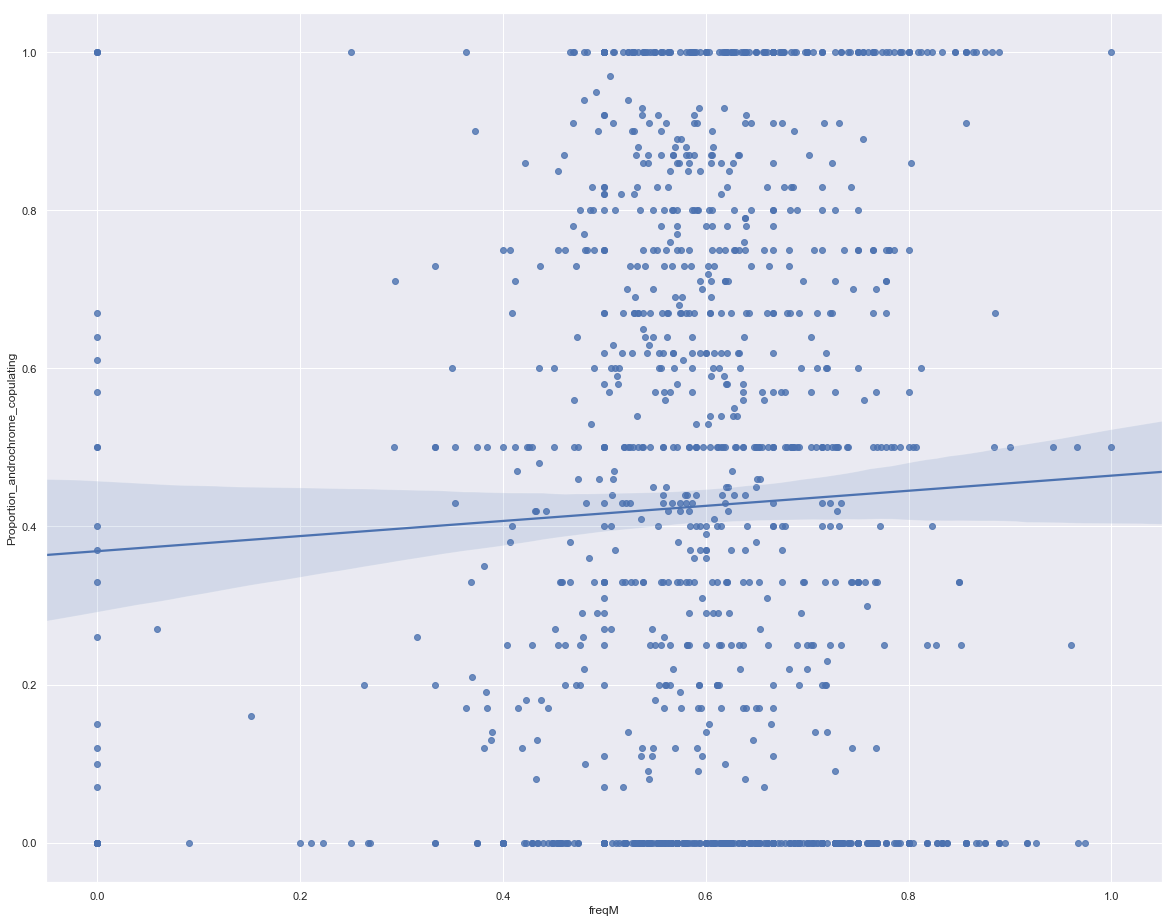

In [60]:
aComp = smf.ols(formula="Proportion_androchrome_copulating~freqM:tFreqA", data=dens[pd.notnull(dens["freqM"])][pd.notnull(dens["tFreqA"])], missing='drop').fit()
print(aComp.summary())
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1 = sns.regplot(x="freqM", y="Proportion_androchrome_copulating", data=dens, ax=axarr)

                                    OLS Regression Results                                   
Dep. Variable:     Proportion_androchrome_copulating   R-squared:                       0.008
Model:                                           OLS   Adj. R-squared:                  0.007
Method:                                Least Squares   F-statistic:                     9.658
Date:                               Thu, 22 Aug 2019   Prob (F-statistic):            0.00193
Time:                                       12:42:11   Log-Likelihood:                -513.10
No. Observations:                               1248   AIC:                             1030.
Df Residuals:                                   1246   BIC:                             1040.
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                 coef    std err          t      P>|t|      

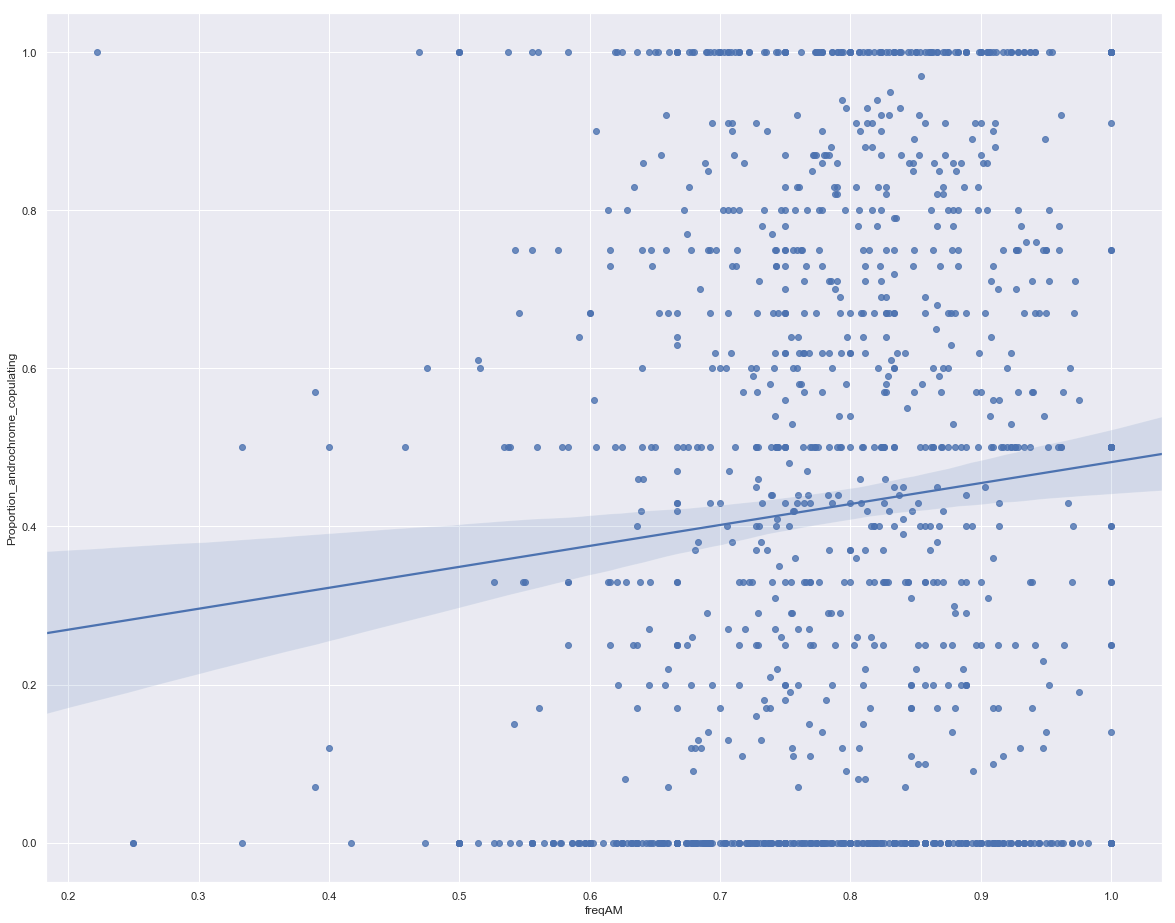

In [24]:
dens["freqAM"] = dens["freqM"]+dens["tFreqA"]
dens.loc[dens["freqAM"] > 1, "freqAM"] = np.nan

aComp = smf.ols(formula="Proportion_androchrome_copulating~freqAM", data=dens[pd.notnull(dens["freqAM"])], missing='drop').fit()
print(aComp.summary())
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1 = sns.regplot(x="freqAM", y="Proportion_androchrome_copulating", data=dens, ax=axarr)

                                   OLS Regression Results                                  
Dep. Variable:     Proportion_infuscans_copulating   R-squared:                       0.003
Model:                                         OLS   Adj. R-squared:                  0.002
Method:                              Least Squares   F-statistic:                     2.969
Date:                             Thu, 22 Aug 2019   Prob (F-statistic):             0.0852
Time:                                     12:56:55   Log-Likelihood:                -441.83
No. Observations:                              906   AIC:                             887.7
Df Residuals:                                  904   BIC:                             897.3
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-

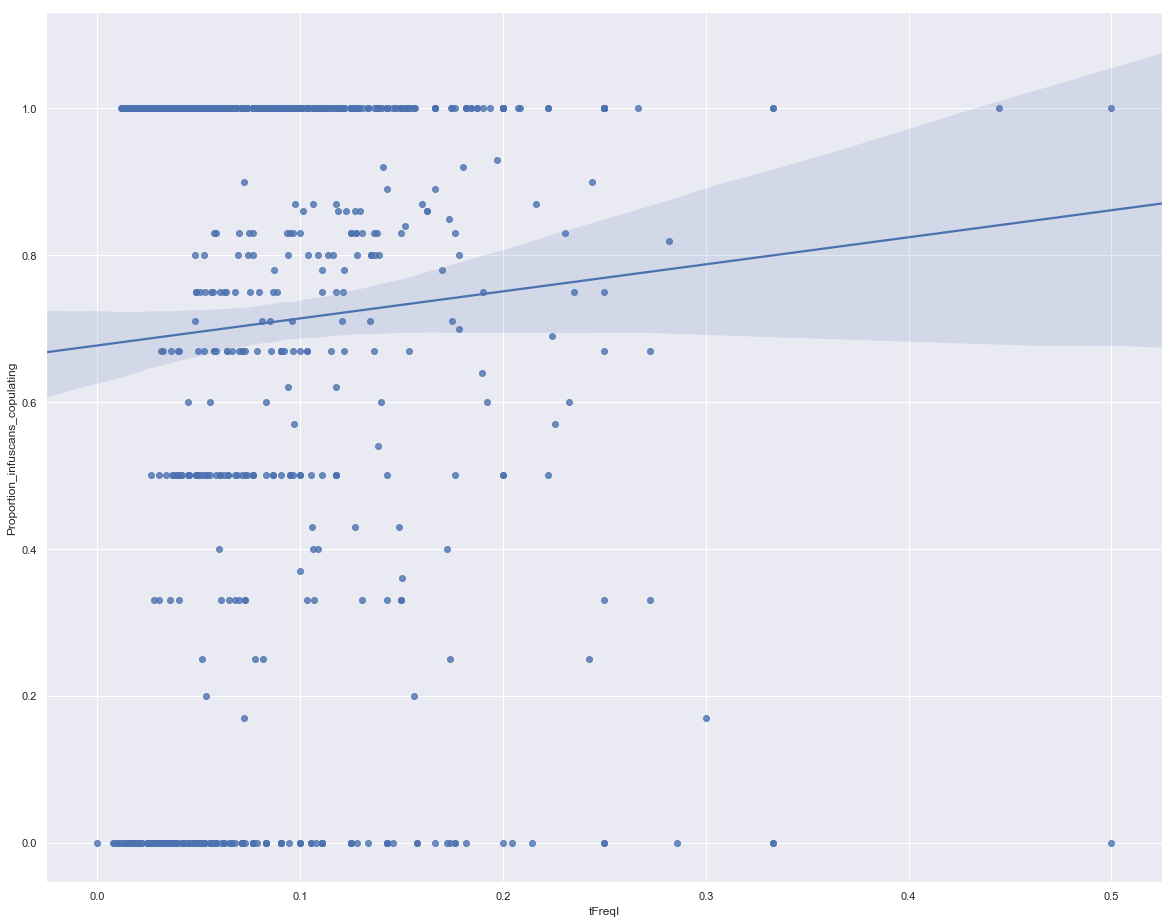

In [29]:
iComp = smf.ols(formula="Proportion_infuscans_copulating~tFreqI", data=dens[pd.notnull(dens["tFreqI"])], missing='drop').fit()
print(iComp.summary())
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1 = sns.regplot(x="tFreqI", y="Proportion_infuscans_copulating", data=dens, ax=axarr)

                                       OLS Regression Results                                       
Dep. Variable:     Proportion_infuscans_obsoleta_copulating   R-squared:                       0.008
Model:                                                  OLS   Adj. R-squared:                  0.006
Method:                                       Least Squares   F-statistic:                     4.286
Date:                                      Thu, 22 Aug 2019   Prob (F-statistic):             0.0389
Time:                                              13:03:29   Log-Likelihood:                -309.13
No. Observations:                                       512   AIC:                             622.3
Df Residuals:                                           510   BIC:                             630.7
Df Model:                                                 1                                         
Covariance Type:                                  nonrobust                                

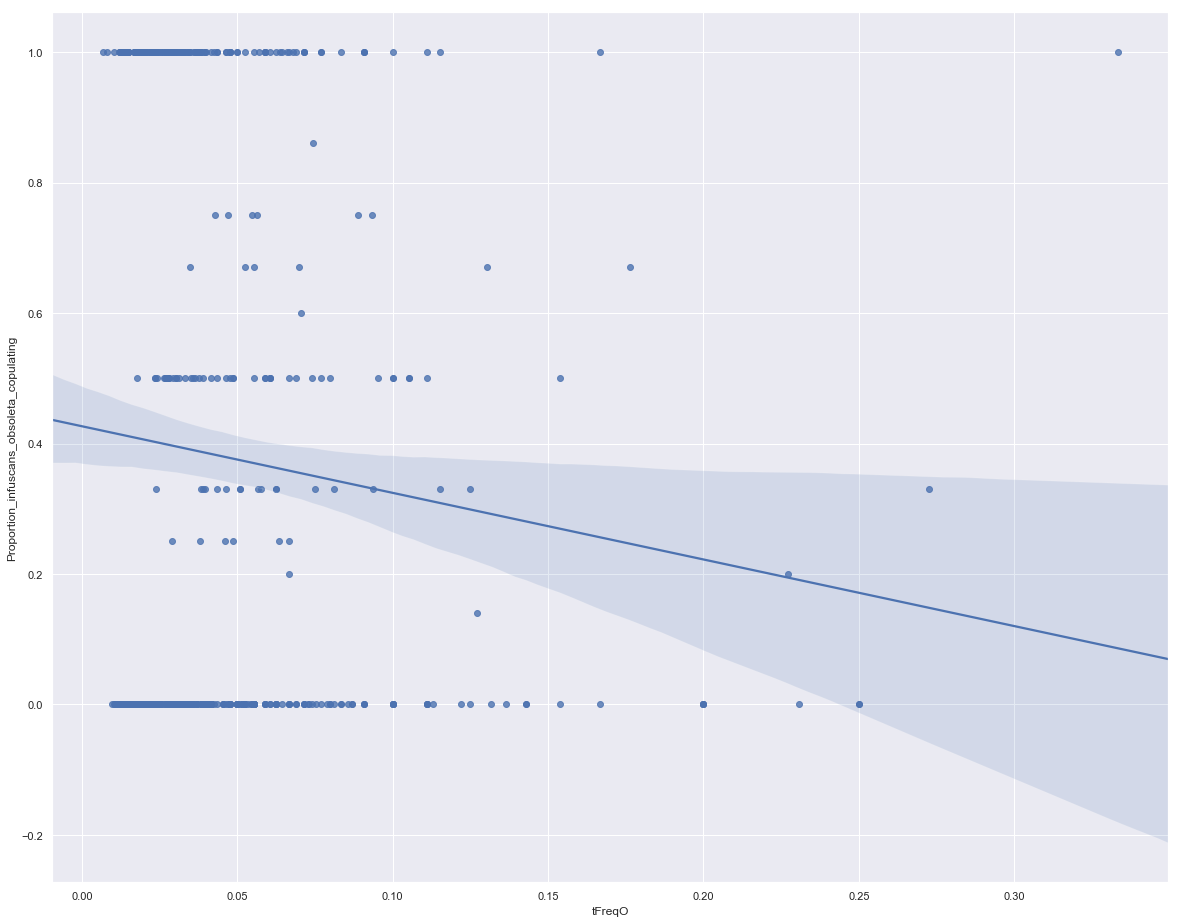

In [36]:
oComp = smf.ols(formula="Proportion_infuscans_obsoleta_copulating~tFreqO", data=dens[pd.notnull(dens["tFreqO"])], missing='drop').fit()
print(oComp.summary())
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1 = sns.regplot(x="tFreqO", y="Proportion_infuscans_obsoleta_copulating", data=dens, ax=axarr)

                                       OLS Regression Results                                       
Dep. Variable:     Proportion_infuscans_obsoleta_copulating   R-squared:                       0.015
Model:                                                  OLS   Adj. R-squared:                  0.013
Method:                                       Least Squares   F-statistic:                     7.744
Date:                                      Thu, 22 Aug 2019   Prob (F-statistic):            0.00559
Time:                                              13:53:29   Log-Likelihood:                -308.35
No. Observations:                                       514   AIC:                             620.7
Df Residuals:                                           512   BIC:                             629.2
Df Model:                                                 1                                         
Covariance Type:                                  nonrobust                                

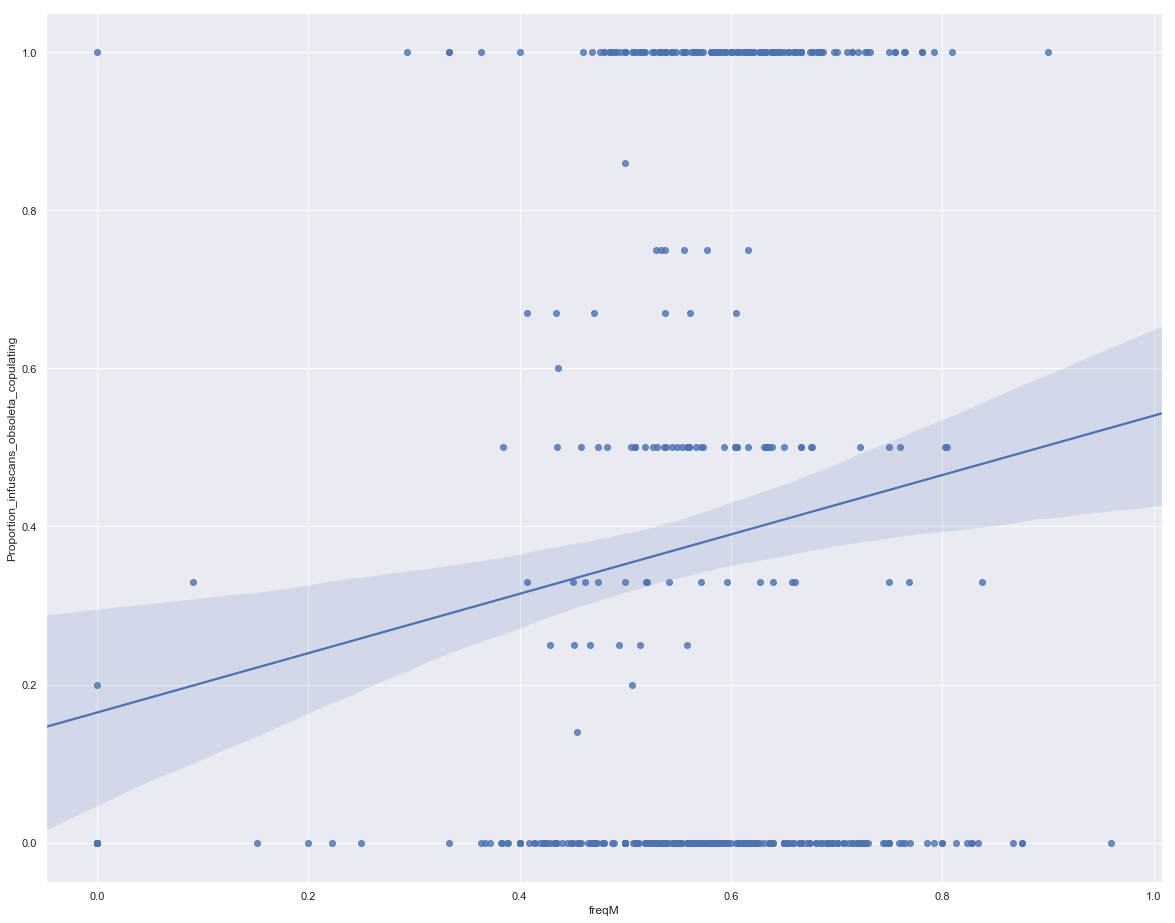

In [57]:
oComp = smf.ols(formula="Proportion_infuscans_obsoleta_copulating~freqM", data=dens[pd.notnull(dens["freqM"])], missing='drop').fit()
print(oComp.summary())
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1 = sns.regplot(x="freqM", y="Proportion_infuscans_obsoleta_copulating", data=dens, ax=axarr)

                                   OLS Regression Results                                  
Dep. Variable:     Proportion_infuscans_copulating   R-squared:                       0.002
Model:                                         OLS   Adj. R-squared:                  0.001
Method:                              Least Squares   F-statistic:                     1.499
Date:                             Thu, 22 Aug 2019   Prob (F-statistic):              0.221
Time:                                     13:53:52   Log-Likelihood:                -442.56
No. Observations:                              906   AIC:                             889.1
Df Residuals:                                  904   BIC:                             898.7
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-

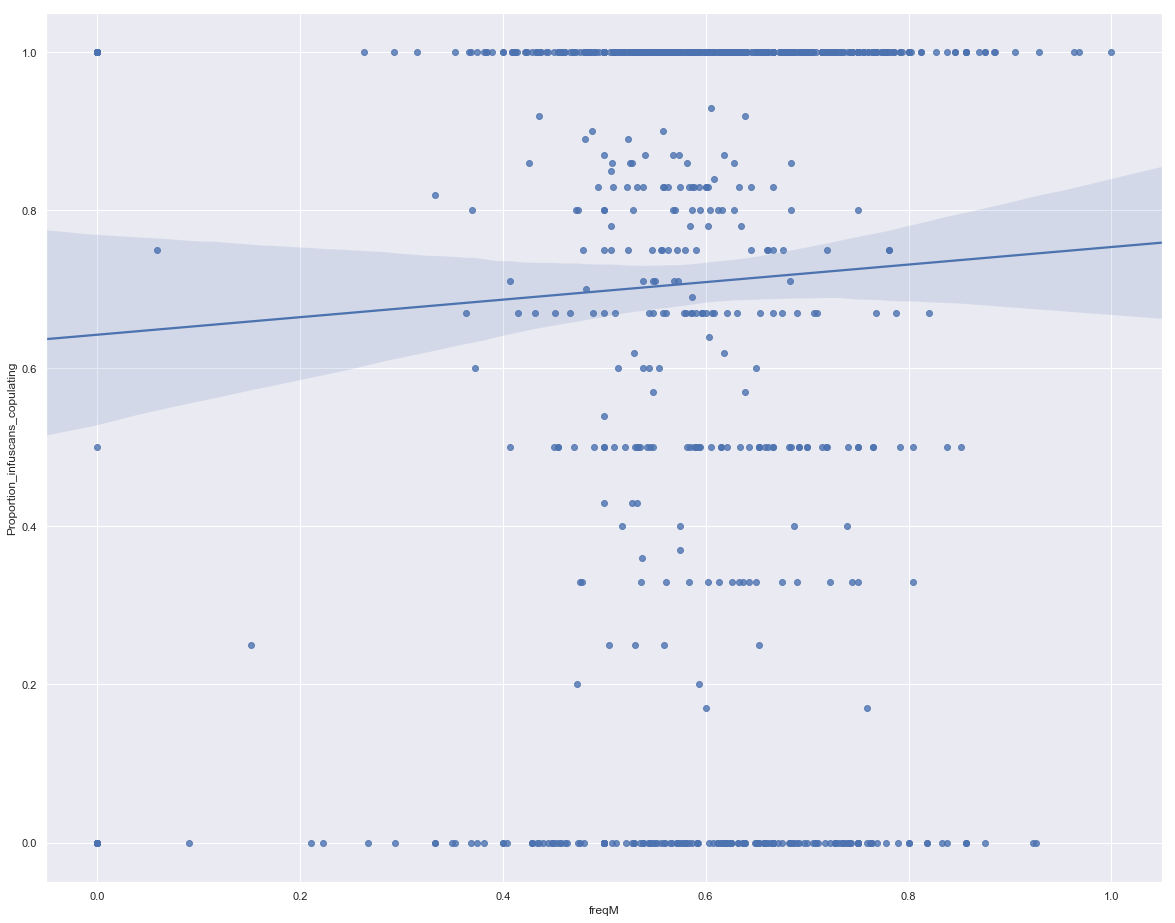

In [58]:
oComp = smf.ols(formula="Proportion_infuscans_copulating~freqM", data=dens[pd.notnull(dens["freqM"])], missing='drop').fit()
print(oComp.summary())
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1 = sns.regplot(x="freqM", y="Proportion_infuscans_copulating", data=dens, ax=axarr)

c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


                                    OLS Regression Results                                   
Dep. Variable:     Proportion_androchrome_copulating   R-squared:                       0.163
Model:                                           OLS   Adj. R-squared:                  0.160
Method:                                Least Squares   F-statistic:                     60.27
Date:                               Thu, 22 Aug 2019   Prob (F-statistic):           1.47e-46
Time:                                       14:21:02   Log-Likelihood:                -406.17
No. Observations:                               1247   AIC:                             822.3
Df Residuals:                                   1242   BIC:                             848.0
Df Model:                                          4                                         
Covariance Type:                           nonrobust                                         
                  coef    std err          t      P>|t|     

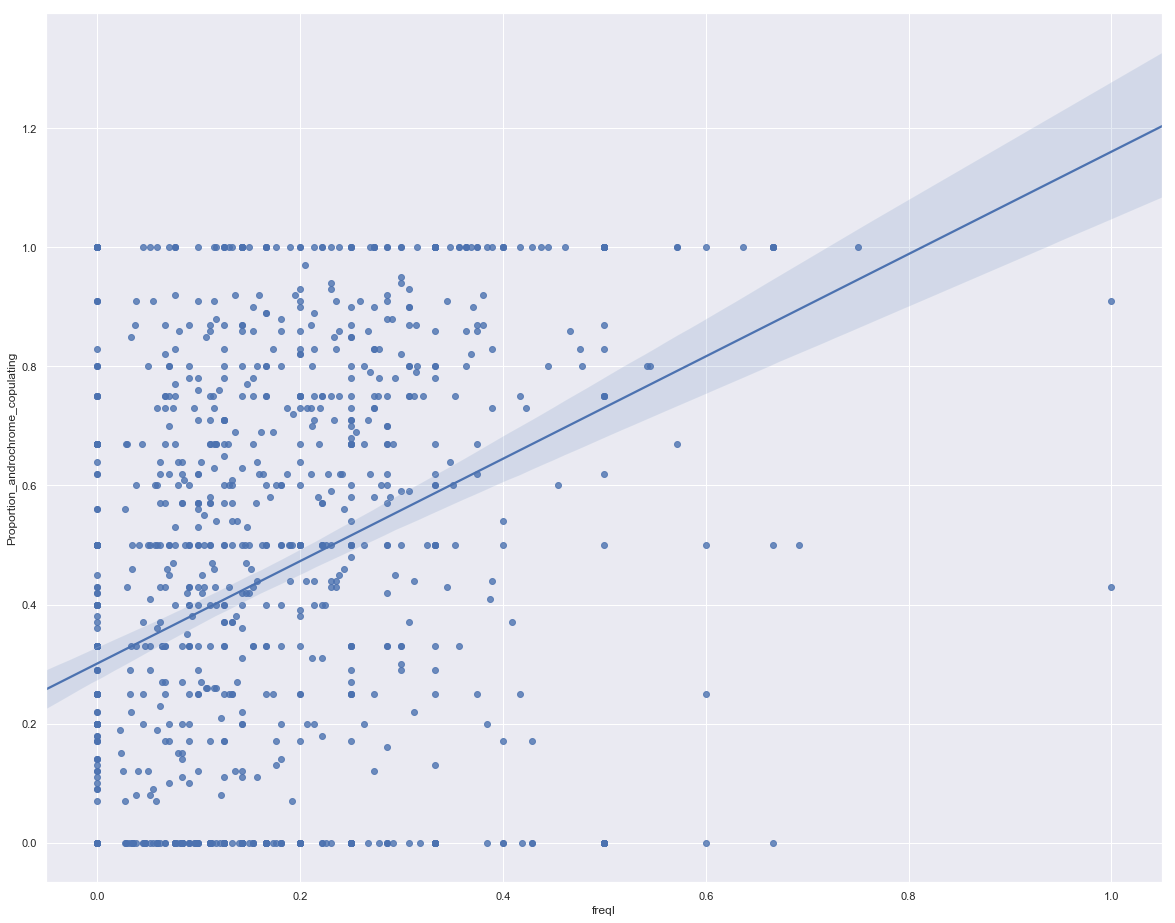

In [90]:
aComp = smf.ols(formula="Proportion_androchrome_copulating~freqI*freqA+freqO", data=dens[pd.notnull(dens["freqA"])][pd.notnull(dens["freqI"])][pd.notnull(dens["freqO"])], missing='drop').fit()
print(aComp.summary())
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1 = sns.regplot(x="freqI", y="Proportion_androchrome_copulating", data=dens, ax=axarr)

c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


                                   OLS Regression Results                                  
Dep. Variable:     Proportion_infuscans_copulating   R-squared:                       0.014
Model:                                         OLS   Adj. R-squared:                  0.012
Method:                              Least Squares   F-statistic:                     6.491
Date:                             Thu, 22 Aug 2019   Prob (F-statistic):            0.00159
Time:                                     14:25:08   Log-Likelihood:                -436.59
No. Observations:                              905   AIC:                             879.2
Df Residuals:                                  902   BIC:                             893.6
Df Model:                                        2                                         
Covariance Type:                         nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-

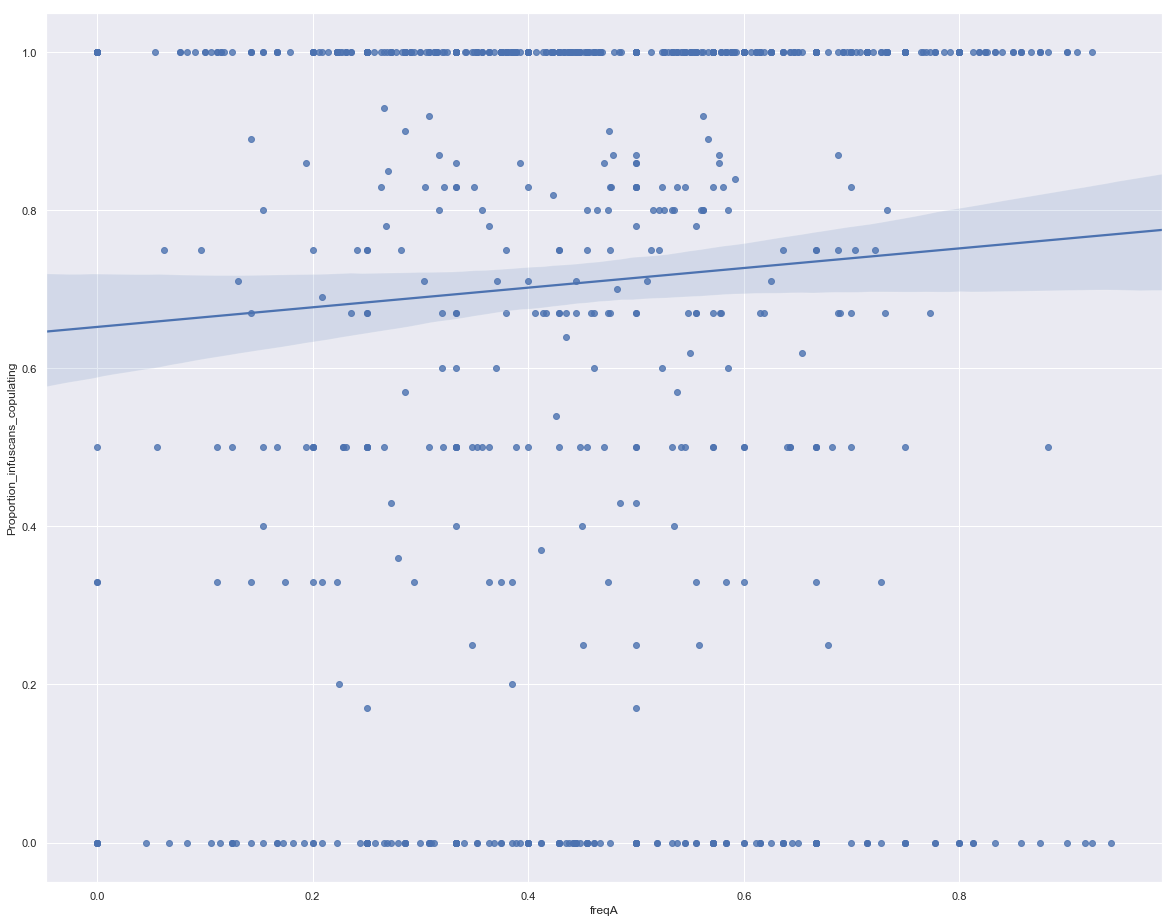

In [103]:
aComp = smf.ols(formula="Proportion_infuscans_copulating~freqI+freqA", data=dens[pd.notnull(dens["freqA"])][pd.notnull(dens["freqI"])][pd.notnull(dens["freqO"])], missing='drop').fit()
print(aComp.summary())
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1 = sns.regplot(x="freqA", y="Proportion_infuscans_copulating", data=dens, ax=axarr)

In [ ]:
aComp = smf.ols(formula="Proportion_infuscans_obsoleta_copulating~freqI*freqA*freqO", data=dens[pd.notnull(dens["freqA"])][pd.notnull(dens["freqI"])][pd.notnull(dens["freqO"])], missing='drop').fit()
print(aComp.summary())
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1 = sns.regplot(x="freqA", y="Proportion_obsoleta_copulating", data=dens, ax=axarr)

In [121]:
dens["matFem"] = dens["No_infuscans"]+dens["No_androchromes"]+dens["No_infuscans_obsoleta"]
dens["freqA"] = dens["No_androchromes"]/dens["matFem"]
dens.loc[dens["freqA"] > 1, "freqA"] = np.nan
dens["freqI"] = dens["No_infuscans"]/dens["matFem"]
dens.loc[dens["freqI"] > 1, "freqI"] = np.nan
dens["freqO"] = dens["No_infuscans_obsoleta"]/dens["matFem"]
dens.loc[dens["freqO"] > 1, "freqO"] = np.nan


test=dens[["freqA", "freqI", "freqO"]]
print(test["freqO"].mean())
print(test["freqA"].mean())
print(test["freqI"].mean())

0.08437228605903996
0.692441542367542
0.22318617157341808


                                    OLS Regression Results                                   
Dep. Variable:     Proportion_androchrome_copulating   R-squared:                       0.063
Model:                                           OLS   Adj. R-squared:                  0.062
Method:                                Least Squares   F-statistic:                     83.01
Date:                               Thu, 22 Aug 2019   Prob (F-statistic):           3.17e-19
Time:                                       14:33:55   Log-Likelihood:                -475.61
No. Observations:                               1247   AIC:                             955.2
Df Residuals:                                   1245   BIC:                             965.5
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                 coef    std err          t      P>|t|      

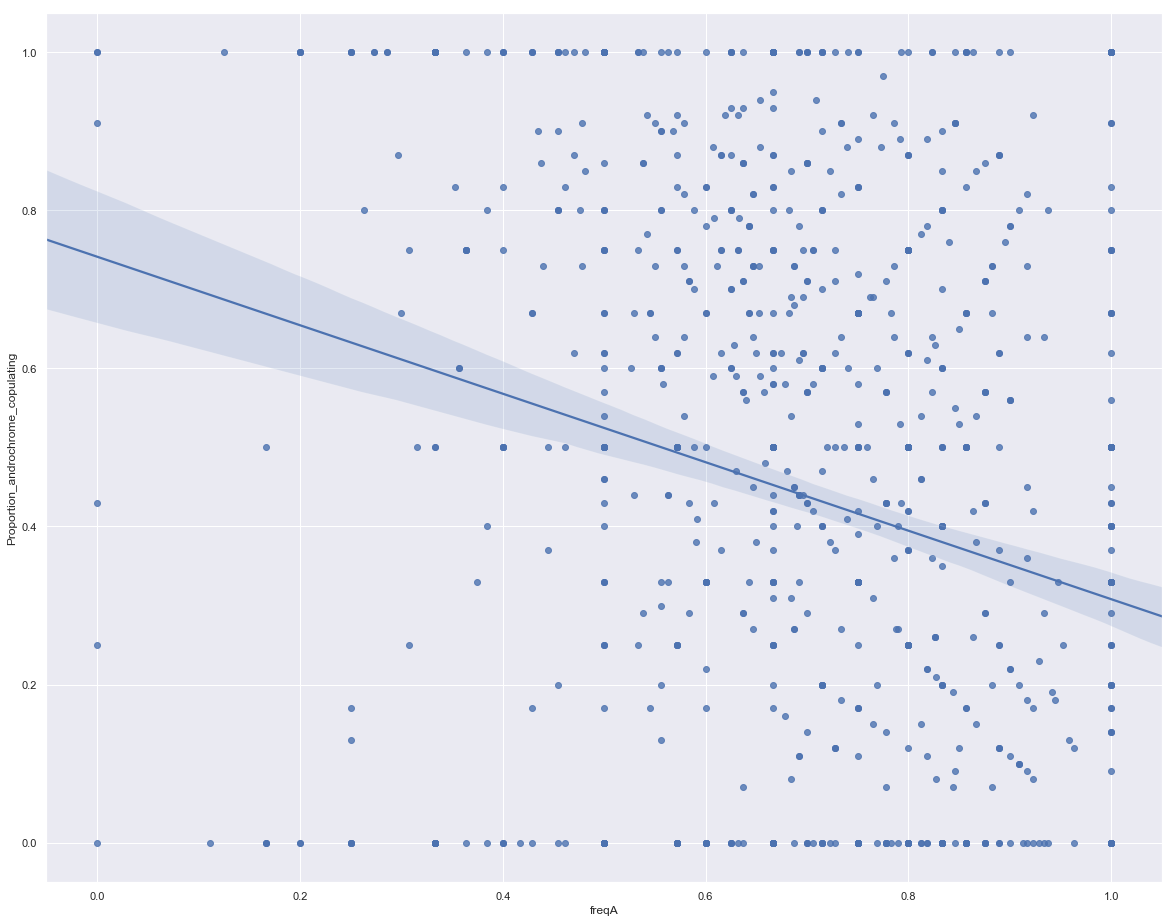

In [113]:
aComp = smf.ols(formula="Proportion_androchrome_copulating~freqA", data=dens[pd.notnull(dens["freqA"])], missing='drop').fit()
print(aComp.summary())
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1 = sns.regplot(x="freqA", y="Proportion_androchrome_copulating", data=dens, ax=axarr)

                                   OLS Regression Results                                  
Dep. Variable:     Proportion_infuscans_copulating   R-squared:                       0.001
Model:                                         OLS   Adj. R-squared:                  0.000
Method:                              Least Squares   F-statistic:                     1.014
Date:                             Thu, 22 Aug 2019   Prob (F-statistic):              0.314
Time:                                     14:33:59   Log-Likelihood:                -443.07
No. Observations:                              907   AIC:                             890.1
Df Residuals:                                  905   BIC:                             899.8
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-

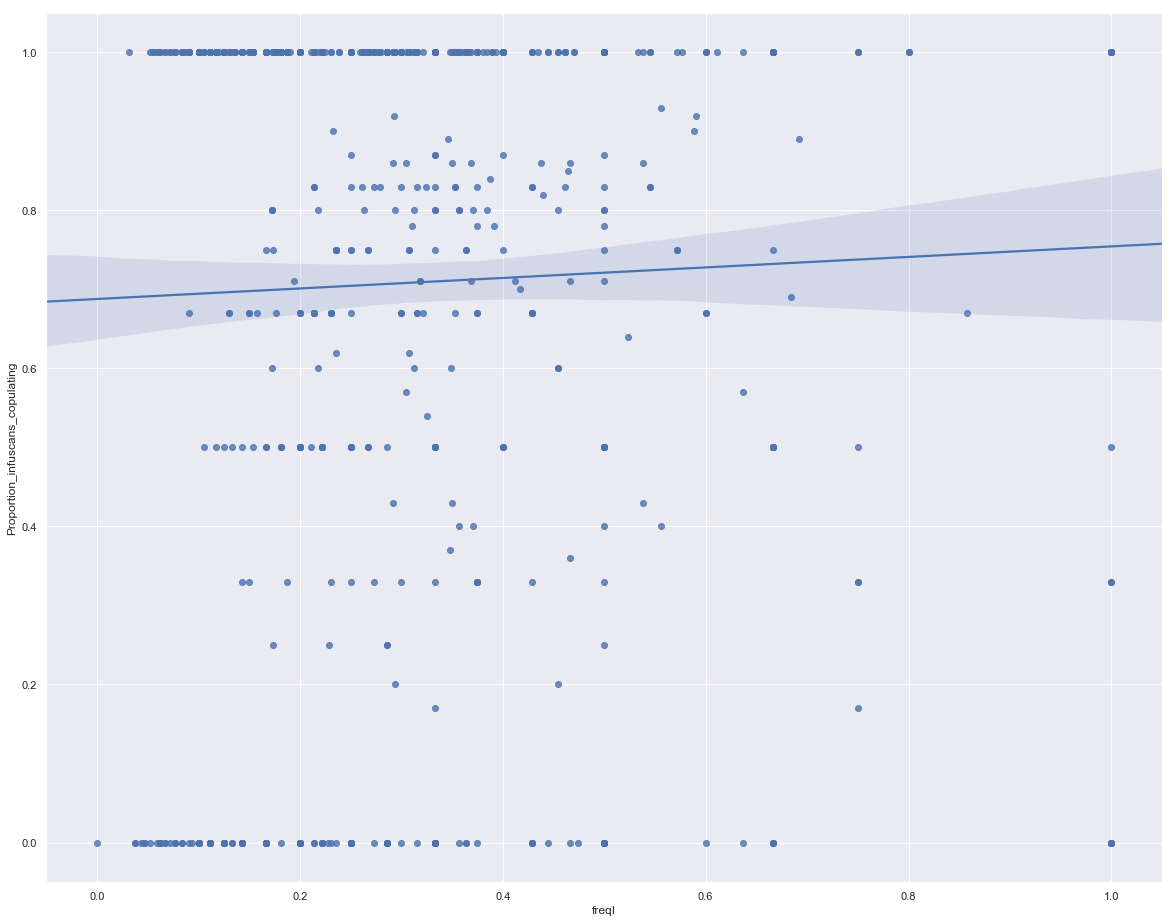

In [114]:
iComp = smf.ols(formula="Proportion_infuscans_copulating~freqI", data=dens[pd.notnull(dens["freqI"])], missing='drop').fit()
print(iComp.summary())
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1 = sns.regplot(x="freqI", y="Proportion_infuscans_copulating", data=dens, ax=axarr)

                                       OLS Regression Results                                       
Dep. Variable:     Proportion_infuscans_obsoleta_copulating   R-squared:                       0.047
Model:                                                  OLS   Adj. R-squared:                  0.046
Method:                                       Least Squares   F-statistic:                     25.56
Date:                                      Thu, 22 Aug 2019   Prob (F-statistic):           5.97e-07
Time:                                              14:34:03   Log-Likelihood:                -300.78
No. Observations:                                       515   AIC:                             605.6
Df Residuals:                                           513   BIC:                             614.0
Df Model:                                                 1                                         
Covariance Type:                                  nonrobust                                

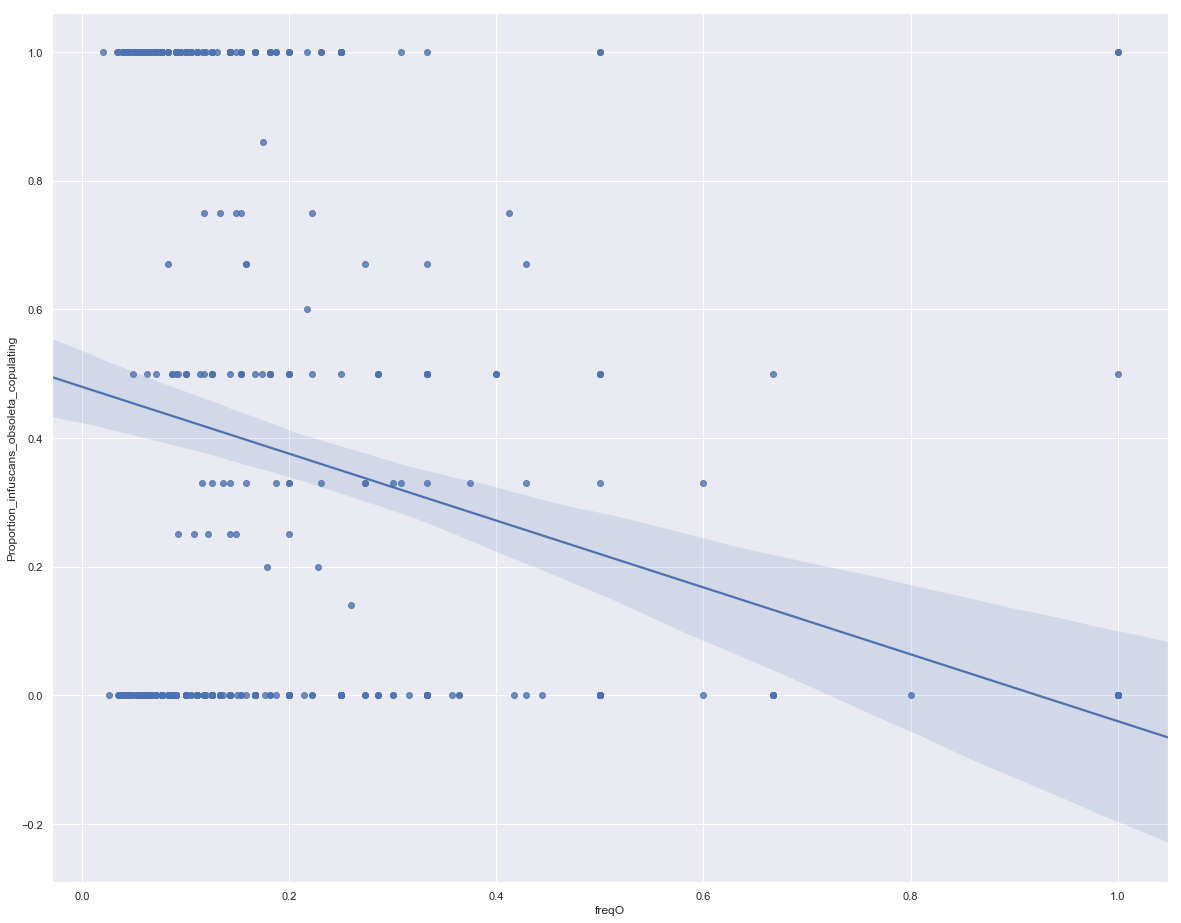

In [115]:
oComp = smf.ols(formula="Proportion_infuscans_obsoleta_copulating~freqO", data=dens[pd.notnull(dens["freqO"])], missing='drop').fit()
print(oComp.summary())
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1 = sns.regplot(x="freqO", y="Proportion_infuscans_obsoleta_copulating", data=dens, ax=axarr)

c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


                                    OLS Regression Results                                   
Dep. Variable:     Proportion_androchrome_copulating   R-squared:                       0.095
Model:                                           OLS   Adj. R-squared:                  0.093
Method:                                Least Squares   F-statistic:                     64.94
Date:                               Thu, 22 Aug 2019   Prob (F-statistic):           1.50e-27
Time:                                       14:40:35   Log-Likelihood:                -453.94
No. Observations:                               1247   AIC:                             913.9
Df Residuals:                                   1244   BIC:                             929.3
Df Model:                                          2                                         
Covariance Type:                           nonrobust                                         
                  coef    std err          t      P>|t|     

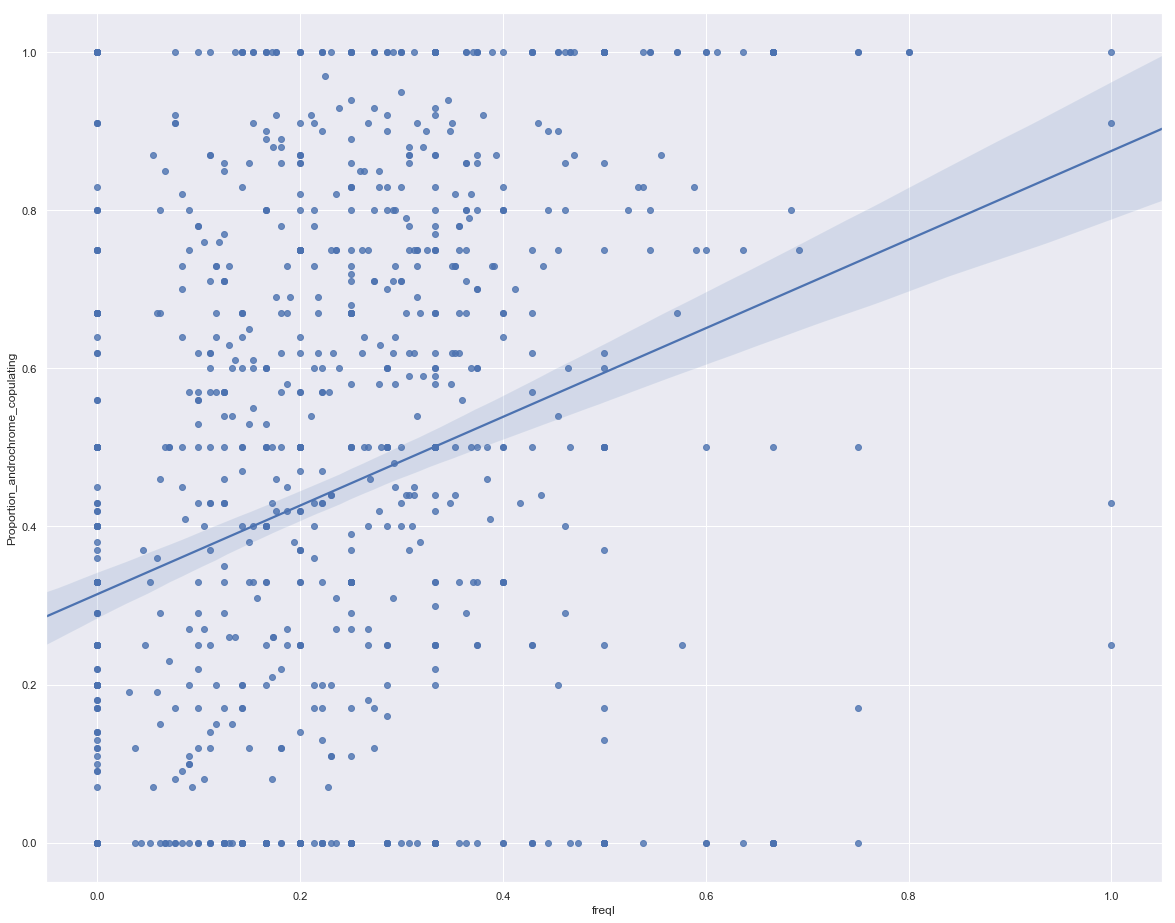

In [133]:
aComp = smf.ols(formula="Proportion_androchrome_copulating~freqI:freqA+freqA", data=dens[pd.notnull(dens["freqA"])][pd.notnull(dens["freqI"])][pd.notnull(dens["freqO"])], missing='drop').fit()
print(aComp.summary())
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1 = sns.regplot(x="freqI", y="Proportion_androchrome_copulating", data=dens, ax=axarr)

c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


                                   OLS Regression Results                                  
Dep. Variable:     Proportion_infuscans_copulating   R-squared:                       0.010
Model:                                         OLS   Adj. R-squared:                  0.003
Method:                              Least Squares   F-statistic:                     1.517
Date:                             Thu, 22 Aug 2019   Prob (F-statistic):              0.169
Time:                                     14:44:07   Log-Likelihood:                -439.01
No. Observations:                              907   AIC:                             892.0
Df Residuals:                                  900   BIC:                             925.7
Df Model:                                        6                                         
Covariance Type:                         nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0

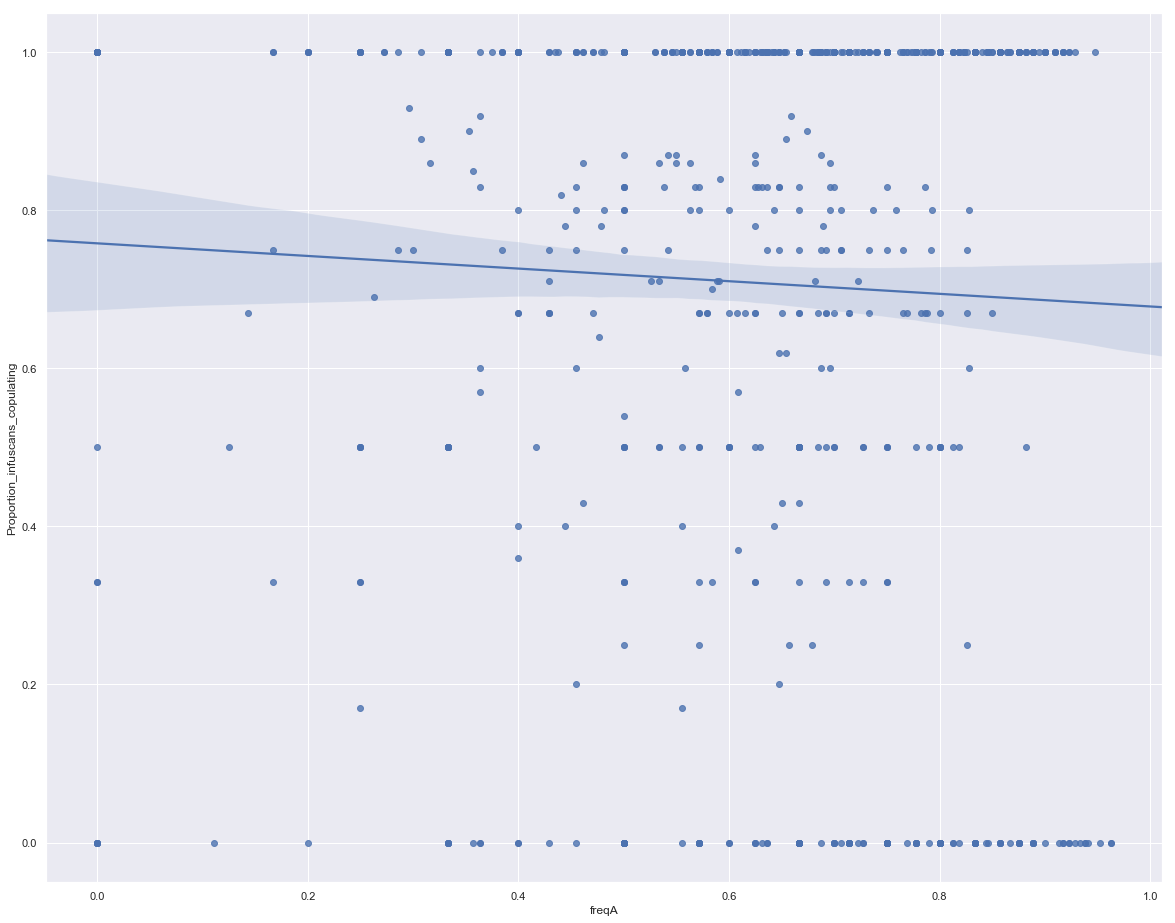

In [145]:
aComp = smf.ols(formula="Proportion_infuscans_copulating~freqA*freqI*freqO", data=dens[pd.notnull(dens["freqA"])][pd.notnull(dens["freqI"])][pd.notnull(dens["freqO"])], missing='drop').fit()
print(aComp.summary())
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1 = sns.regplot(x="freqA", y="Proportion_infuscans_copulating", data=dens, ax=axarr)

c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


                                       OLS Regression Results                                       
Dep. Variable:     Proportion_infuscans_obsoleta_copulating   R-squared:                       0.135
Model:                                                  OLS   Adj. R-squared:                  0.130
Method:                                       Least Squares   F-statistic:                     26.54
Date:                                      Thu, 22 Aug 2019   Prob (F-statistic):           5.76e-16
Time:                                              14:46:27   Log-Likelihood:                -276.02
No. Observations:                                       515   AIC:                             560.0
Df Residuals:                                           511   BIC:                             577.0
Df Model:                                                 3                                         
Covariance Type:                                  nonrobust                                

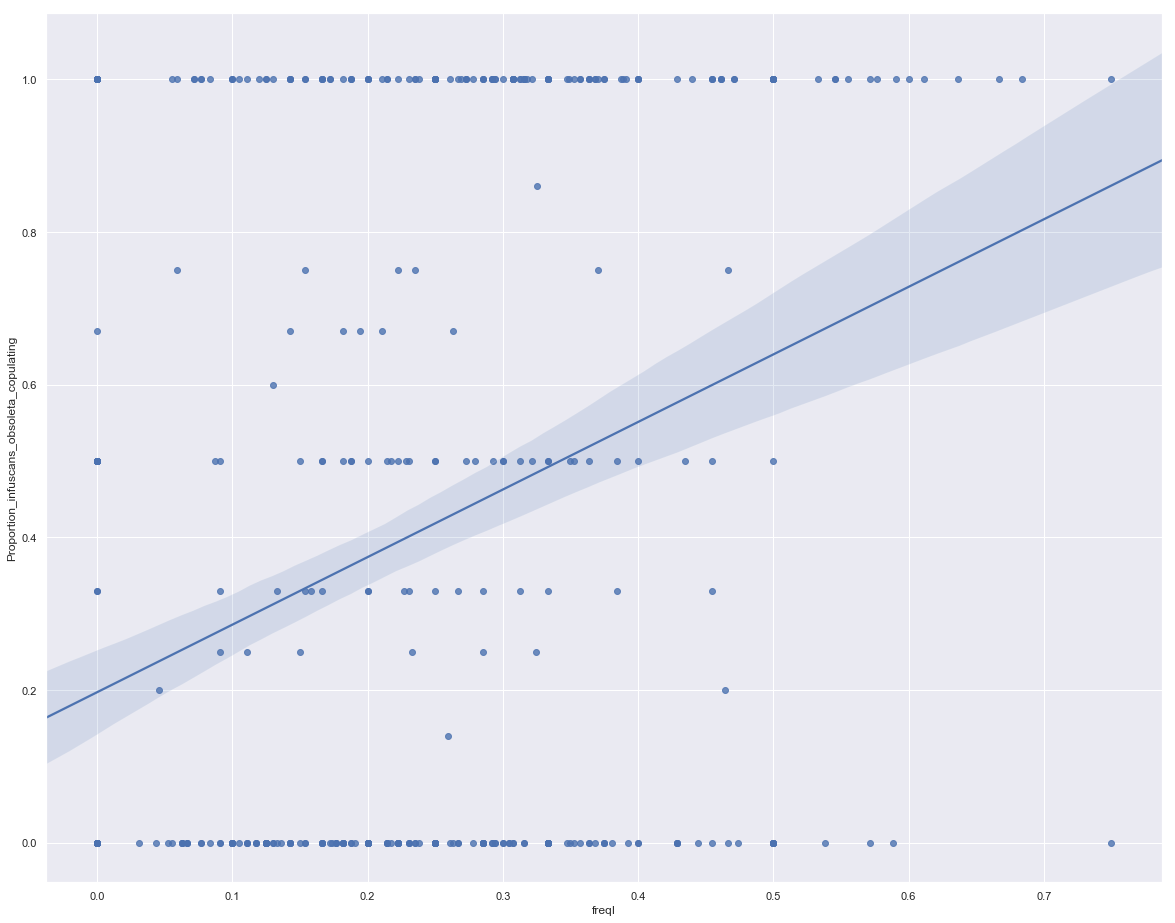

In [150]:
aComp = smf.ols(formula="Proportion_infuscans_obsoleta_copulating~freqI*freqO+freqA", data=dens[pd.notnull(dens["freqA"])][pd.notnull(dens["freqI"])][pd.notnull(dens["freqO"])], missing='drop').fit()
print(aComp.summary())
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1 = sns.regplot(x="freqI", y="Proportion_infuscans_obsoleta_copulating", data=dens, ax=axarr)